In [62]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
output_notebook()
%matplotlib inline 


Loading BokehJS ...

In [63]:
df_train = pd.read_csv('train.csv', usecols = ['Semana', 'Producto_ID','Demanda_uni_equil','Dev_uni_proxima','Venta_uni_hoy'],
                           dtype  = {'Semana': 'int32',
                                     'Producto_ID':'int32',
                                     'Venta_hoy':'float32',
                                     'Venta_uni_hoy': 'int32',
                                     'Dev_uni_proxima':'int32',
                                     'Dev_proxima':'float32',
                                     'Demanda_uni_equil':'int32'})
agg  = df_train.groupby(['Semana', 'Producto_ID'], as_index=False).agg(['count','sum', 'min', 'max','median','mean'])
agg.columns  =  ['_'.join(col).strip() for col in agg.columns.values]
del(df_train)

## Meaning of different columns: 
##### Semana — Week number (From Thursday to Wednesday)
##### Agencia_ID — Sales Depot ID
##### Canal_ID — Sales Channel ID
##### Ruta_SAK — Route ID (Several routes = Sales Depot)
##### Cliente_ID — Client ID
##### NombreCliente — Client name
##### Producto_ID — Product ID
##### NombreProducto — Product Name
##### Venta_uni_hoy — Sales unit this week (integer)
##### Venta_hoy — Sales this week (unit: pesos)
##### Dev_uni_proxima — Returns unit next week (integer)
##### Dev_proxima — Returns next week (unit: pesos)
##### Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)
##### Semana= week , Producto_ID= Product ID, Venta_hoy= sale today, Venta_uni_hoy= single sale today 

## a simple product aggregate. 

In [85]:
agg.sort_index(ascending=True)


Venta_uni_hoy_count  Venta_uni_hoy_sum  Venta_uni_hoy_min  \
Semana Producto_ID                                                              
3      41                             8               3666                  0   
       53                             6               2924                116   
       72                         17825              87154                  0   
       73                         31495             104239                  0   
       100                           22                176                  0   
       106                          476               2841                  0   
       107                            5                 14                  0   
       108                           19               1400                  8   
       123                         1866              21718                  1   
       131                           67               5161                  2   
       132                           43               5744                  4   
       134                           41                863                  3   
       135                           43               1581                  2   
       141                         3045              30551                  0   
       145                         1066              23879                  0   
       151                           40                557                  1   
       157                            6                711                  6   
       160                          187               1346                  0   
       162                           12                 19                  1   
       163                          109                179                  1   
       183                          516               4049                  0   
       202                         3089              38817                  0   
       205                          431               5987                  0   
       214                           42               5046                  0   
       217                          498               3669                  0   
       303                        28550             162644                  0   
       306                           44                380                  0   
       323                        19744              48097                  0   
       325                        14997              32636                  0   
       328                        16048              33773                  0   
...                                 ...                ...                ...   
9      49552                          4                  0                  0   
       49734                         54               2658                  1   
       49735                        205               7511                  1   
       49736                        191               7371                  1   
       49737                         28                610                  3   
       49738                         18                415                  6   
       49739                         29                855                  5   
       49740                         16                387                  5   
       49754                          4                 12                  3   
       49765                        193              11887                  0   
       49769                        165              16612                  0   
       49779                        126                783                  0   
       49781                          2                  0                  0   
       49782                        637               5068                  0   
       49810                          2                 34                  8   
       49860                        243               4058                  0   
       49920                        105            

In [65]:

agg.shape

(10908, 18)

In [66]:
agg.head()

Venta_uni_hoy_count  Venta_uni_hoy_sum  Venta_uni_hoy_min  \
Semana Producto_ID                                                              
3      41                             8               3666                  0   
       53                             6               2924                116   
       72                         17825              87154                  0   
       73                         31495             104239                  0   
       100                           22                176                  0   

                    Venta_uni_hoy_max  Venta_uni_hoy_median  \
Semana Producto_ID                                            
3      41                        2064                 115.0   
       53                        1289                 417.5   
       72                         600                   4.0   
       73                         287                   2.0   
       100                         40                   4.0   

                    Venta_uni_hoy_mean  Dev_uni_proxima_count  \
Semana Producto_ID                                              
3      41                   458.250000                      8   
       53                   487.333333                      6   
       72                     4.889425                  17825   
       73                     3.309700                  31495   
       100                    8.000000                     22   

                    Dev_uni_proxima_sum  Dev_uni_proxima_min  \
Semana Producto_ID                                             
3      41                           104                    0   
       53                             0                    0   
       72                          1979                    0   
       73                          3015                    0   
       100                          168                    0   

                    Dev_uni_proxima_max  Dev_uni_proxima_median  \
Semana Producto_ID                                                
3      41                            90                     0.0   
       53                             0                     0.0   
       72                            72                     0.0   
       73                            26                     0.0   
       100                           63                     0.0   

                    Dev_uni_proxima_mean  Demanda_uni_equil_count  \
Semana Producto_ID                                                  
3      41                      13.000000                        8   
       53                       0.000000                        6   
       72                       0.111024                    17825   
       73                       0.095729                    31495   
       100                      7.636364                       22   

                    Demanda_uni_equil_sum  Demanda_uni_equil_min  \
Semana Producto_ID                                                 
3      41                            3661                      0   
       53                            2924                    116   
       72                           86135                      0   
       73                          101456                      0   
       100                            170                      0   

                    Demanda_uni_equil_max  Demanda_uni_equil_median  \
Semana Producto_ID                                                    
3      41                            2064                     115.0   
       53                            1289                     417.5   
       72                             600                       4.0   
       73                             287                       2.0   
       100                             40                       3.5   

                    Demanda_uni_equil_mean  
Semana Producto_ID                          
3      41                       457.625000  
       53                       487.33333

### Analyzing products table 

In [68]:
products  =  pd.read_csv("producto_tabla.csv")
products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)
w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})
products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ', expand=False).astype('float')
products.head()

Producto_ID                          NombreProducto  \
0            0                       NO IDENTIFICADO 0   
1            9               Capuccino Moka 750g NES 9   
2           41  Bimbollos Ext sAjonjoli 6p 480g BIM 41   
3           53          Burritos Sincro 170g CU LON 53   
4           72     Div Tira Mini Doradita 4p 45g TR 72   

                 short_name         brand  weight  pieces  
0          NO IDENTIFICADO   IDENTIFICADO     NaN     NaN  
1           Capuccino Moka            NES   750.0     NaN  
2  Bimbollos Ext sAjonjoli            BIM   480.0     6.0  
3          Burritos Sincro            LON   170.0     NaN  
4   Div Tira Mini Doradita             TR    45.0     4.0

In [14]:
products.tail()

Producto_ID                                  NombreProducto  \
2587        49992             Tostado Integral 180g MTA WON 49992   
2588        49993             Tostado Integral 180g TAB WON 49993   
2589        49994      Tostado Int 0pct Grasa Azuc 200g WON 49994   
2590        49996  Tostado Int 0pct Grasa Azuc 200g MTA WON 49996   
2591        49997  Tostado Int 0pct Grasa Azuc 200g TAB WON 49997   

             short_name brand  weight  pieces  
2587  Tostado Integral    WON   180.0     NaN  
2588  Tostado Integral    WON   180.0     NaN  
2589       Tostado Int    WON   200.0     NaN  
2590       Tostado Int    WON   200.0     NaN  
2591       Tostado Int    WON   200.0     NaN

In [15]:
products.short_name.value_counts(dropna=False)

Pan Blanco                       39
Tortillinas                      37
Deliciosas Vainilla              35
Medias Noches                    25
Wonder                           22
Pan Integral                     19
Deliciosas Chochitos             17
Canelitas                        17
Suavicremas Chocolate            17
Suavicremas Vainilla             17
Choco Roles                      16
Suavicremas Fresa                16
Mantecadas Nuez                  15
Chocochispas                     15
Tostada Ondulada Tubo            15
Canapinas                        15
Tostado                          14
Barritas Fresa                   14
Barritas Pina                    13
Bran Frut Fresa                  12
Triki Trakes                     12
Deliciosas Chocochispas          12
Barra Multigrano Nuez            12
Mantecadas                       12
Totopo Chilaquiles               12
Plativolos                       12
Galleta Gansito                  12
Bollos BK                   

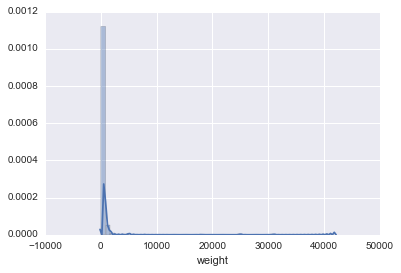

In [18]:
sns.distplot(products.weight.dropna())

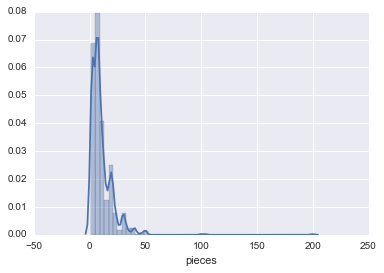

In [19]:
sns.distplot(products.pieces.dropna())

## Lets clean up product names a bit, we have ~1000 unique names once we cleaned the weights, but there is much more work to be done
## Products have some abbreviation leftovers that I did not clean, products have similar names but different word forms, etc.

In [20]:
products.short_name.nunique()

1014

## Let's clean stop words and leave only the word stems 

In [27]:
from nltk.corpus import stopwords
print(stopwords.words("spanish"))

[u'de', u'la', u'que', u'el', u'en', u'y', u'a', u'los', u'del', u'se', u'las', u'por', u'un', u'para', u'con', u'no', u'una', u'su', u'al', u'lo', u'como', u'm\xe1s', u'pero', u'sus', u'le', u'ya', u'o', u'este', u's\xed', u'porque', u'esta', u'entre', u'cuando', u'muy', u'sin', u'sobre', u'tambi\xe9n', u'me', u'hasta', u'hay', u'donde', u'quien', u'desde', u'todo', u'nos', u'durante', u'todos', u'uno', u'les', u'ni', u'contra', u'otros', u'ese', u'eso', u'ante', u'ellos', u'e', u'esto', u'm\xed', u'antes', u'algunos', u'qu\xe9', u'unos', u'yo', u'otro', u'otras', u'otra', u'\xe9l', u'tanto', u'esa', u'estos', u'mucho', u'quienes', u'nada', u'muchos', u'cual', u'poco', u'ella', u'estar', u'estas', u'algunas', u'algo', u'nosotros', u'mi', u'mis', u't\xfa', u'te', u'ti', u'tu', u'tus', u'ellas', u'nosotras', u'vosostros', u'vosostras', u'os', u'm\xedo', u'm\xeda', u'm\xedos', u'm\xedas', u'tuyo', u'tuya', u'tuyos', u'tuyas', u'suyo', u'suya', u'suyos', u'suyas', u'nuestro', u'nuestra', 

In [28]:
products['short_name_processed'] = (products['short_name']
                                        .map(lambda x: " ".join([i for i in x.lower()
                                                                 .split() if i not in stopwords.words("spanish")])))

In [29]:

products['short_name_processed'].nunique()

992

In [30]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [31]:
print(stemmer.stem("Tortillas"))

tortill


In [32]:
products['short_name_processed'] = (products['short_name_processed']
                                        .map(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()])))

In [33]:
products.short_name_processed.nunique()

963

## let's have a look, what is the product with the biggest demand of all times

In [38]:
df = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
      groupby('short_name')['Demanda_uni_equil_sum'].sum().sort_values(ascending=False))

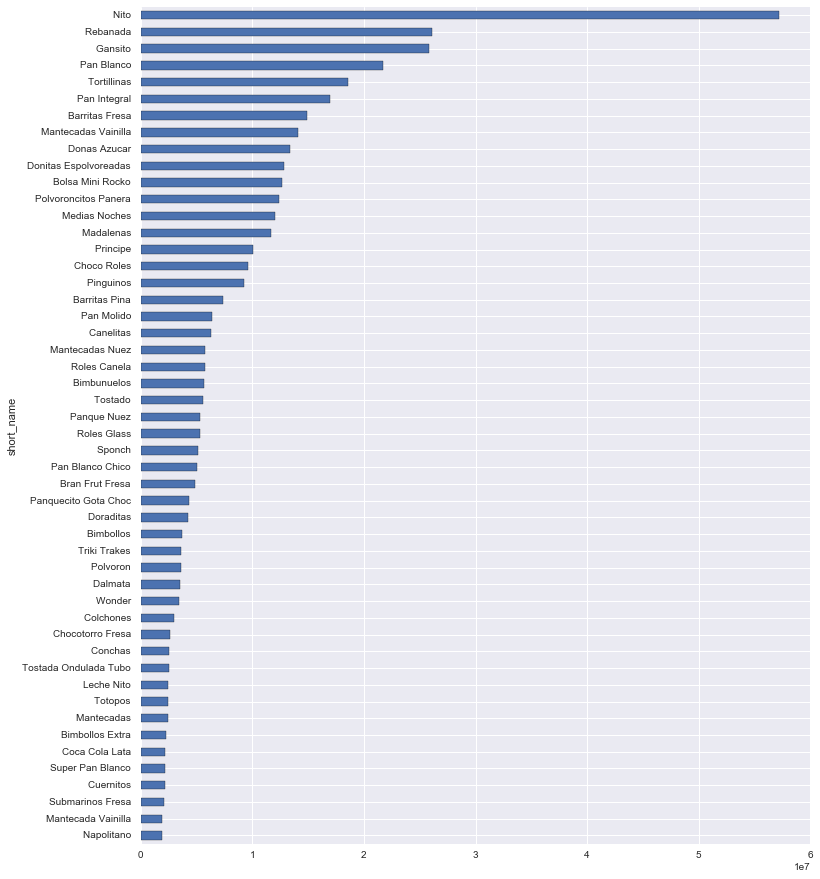

In [39]:
plt.figure(figsize = (12,15))
df.head(50).sort_values().plot(kind='barh')

## The best seller is by far Nito.


## a quick look at the distributions

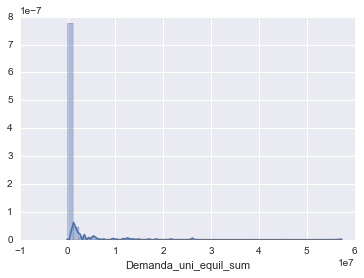

In [40]:
sns.distplot(df)

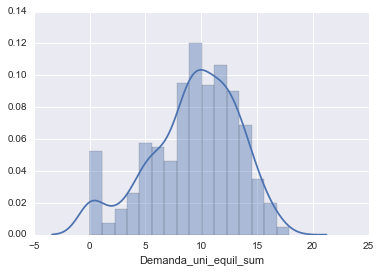

In [41]:
sns.distplot(np.log1p(df))

## expanding the aggregate

In [42]:
df = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
      groupby('short_name')['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 'Dev_uni_proxima_count']
      .sum().sort_values(by = 'Demanda_uni_equil_sum', ascending=False))

In [43]:
df.describe().T

count           mean           std  min      25%  \
Demanda_uni_equil_sum  716.0  748493.729050  3.268453e+06  0.0   958.50   
Venta_uni_hoy_sum      716.0  757362.175978  3.295051e+06  0.0  1047.50   
Dev_uni_proxima_sum    716.0   13495.215084  4.278629e+04  0.0    17.50   
Dev_uni_proxima_count  716.0  103604.000000  3.554669e+05  1.0    45.75   

                           50%        75%         max  
Demanda_uni_equil_sum  18352.5  194902.25  57205818.0  
Venta_uni_hoy_sum      18927.0  201415.50  57569345.0  
Dev_uni_proxima_sum      465.5    6409.50    496495.0  
Dev_uni_proxima_count    954.0   14759.00   3068521.0

### There are interesting things. There are products for which Demanda_uni_equil_sum = 0 and other fields are not equal to 0

In [44]:
df[df.Demanda_uni_equil_sum == 0].count()

Demanda_uni_equil_sum    32
Venta_uni_hoy_sum        32
Dev_uni_proxima_sum      32
Dev_uni_proxima_count    32
dtype: int64

In [45]:
df[df.Demanda_uni_equil_sum == 0]

Demanda_uni_equil_sum  \
short_name                                                      
Max Two Pack Elote Mango                                    0   
Combo Tost Clas mas Frijol                                  0   
Surtido                                                     0   
Two Pack Classicas AvellanaFsa                              0   
Mentho Plus Miel                                            0   
Clasicas de Regalo Sabor Chocol                             0   
Orejas                                                      0   
Lata Butter                                                 0   
Pan Tost Silueta                                            0   
Galleta Confeti                                             0   
StarGum Yerbabuena Intensa                                  0   
Fruttimania Manzana Toy Story                               0   
Barra Silueta Fresa                                         0   
Galleta Granel Classics Chocolate GBI                       0   
Lata Surtido Danesa Rosas                                   0   
Duo Silueta                                                 0   
Duo Saladas                                                 0   
Paletina para Cafe NES                                      0   
Duo Polvoron                                                0   
Aparas Panettone                                            0   
Suavicremas Fresa KC                                        0   
Pack Galleta Leche Gansito                                  0   
Pack                                                        0   
Duo Gansito Clasico                                         0   
Duo BranFrut Fsa mas                                        0   
Tostada Ond Tubo                                            0   
Duo Barrita Fresa y Pina                                    0   
Suavicremas Chocolate KC                                    0   
Donas Canela                                                0   
Tartaletas Pina Granel Cons                                 0   
Pan Tostado con Fibra                                       0   
Galleta Cereleta MG                                         0   

                                        Venta_uni_hoy_sum  \
short_name                                                  
Max Two Pack Elote Mango                                0   
Combo Tost Clas mas Frijol                              0   
Surtido                                                 0   
Two Pack Classicas AvellanaFsa                          0   
Mentho Plus Miel                                      200   
Clasicas de Regalo Sabor Chocol                         0   
Orejas                                                  0   
Lata Butter                                             0   
Pan Tost Silueta                                        0   
Galleta Confeti                                         0   
StarGum Yerbabuena Intensa                              0   
Fruttimania Manzana Toy Story                           0   
Barra Silueta Fresa                                     0   
Galleta Granel Classics Chocolate GBI                   0   
Lata Surtido Danesa Rosas                               0   
Duo Silueta                                             0   
Duo Saladas                                             0   
Paletina para Cafe NES                                  0   
Duo Polvoron                                            0   
Aparas Panettone                                        1   
Suavicremas Fresa KC                                    0   
Pack Galleta Leche Gansito                              0   
Pack                                                    0   
Duo Gansito Clasico                                   569   
Duo BranFrut Fsa mas                                    0   
Tostada Ond Tubo                                        3   
Duo Barrita Fresa y Pina                                0   
Suavicremas Chocolate KC                                0   

### Similarly there are products with 0 sales and only returns

In [46]:
df[df.Venta_uni_hoy_sum == 0]

Demanda_uni_equil_sum  \
short_name                                                      
Max Two Pack Elote Mango                                    0   
Combo Tost Clas mas Frijol                                  0   
Surtido                                                     0   
Two Pack Classicas AvellanaFsa                              0   
Clasicas de Regalo Sabor Chocol                             0   
Orejas                                                      0   
Lata Butter                                                 0   
Pan Tost Silueta                                            0   
Galleta Confeti                                             0   
StarGum Yerbabuena Intensa                                  0   
Fruttimania Manzana Toy Story                               0   
Barra Silueta Fresa                                         0   
Galleta Granel Classics Chocolate GBI                       0   
Lata Surtido Danesa Rosas                                   0   
Duo Silueta                                                 0   
Duo Saladas                                                 0   
Paletina para Cafe NES                                      0   
Duo Polvoron                                                0   
Suavicremas Fresa KC                                        0   
Pack Galleta Leche Gansito                                  0   
Pack                                                        0   
Duo BranFrut Fsa mas                                        0   
Duo Barrita Fresa y Pina                                    0   
Suavicremas Chocolate KC                                    0   
Tartaletas Pina Granel Cons                                 0   
Pan Tostado con Fibra                                       0   

                                        Venta_uni_hoy_sum  \
short_name                                                  
Max Two Pack Elote Mango                                0   
Combo Tost Clas mas Frijol                              0   
Surtido                                                 0   
Two Pack Classicas AvellanaFsa                          0   
Clasicas de Regalo Sabor Chocol                         0   
Orejas                                                  0   
Lata Butter                                             0   
Pan Tost Silueta                                        0   
Galleta Confeti                                         0   
StarGum Yerbabuena Intensa                              0   
Fruttimania Manzana Toy Story                           0   
Barra Silueta Fresa                                     0   
Galleta Granel Classics Chocolate GBI                   0   
Lata Surtido Danesa Rosas                               0   
Duo Silueta                                             0   
Duo Saladas                                             0   
Paletina para Cafe NES                                  0   
Duo Polvoron                                            0   
Suavicremas Fresa KC                                    0   
Pack Galleta Leche Gansito                              0   
Pack                                                    0   
Duo BranFrut Fsa mas                                    0   
Duo Barrita Fresa y Pina                                0   
Suavicremas Chocolate KC                                0   
Tartaletas Pina Granel Cons                             0   
Pan Tostado con Fibra                                   0   

                                        Dev_uni_proxima_sum  \
short_name                                                    
Max Two Pack Elote Mango                                  7   
Combo Tost Clas mas Frijol                               47   
Surtido                                                 446   
Two Pack Classicas AvellanaFsa                            3   
Clasicas de Regalo Sabor Chocol                           3   
Orejas                                                   10   
Lata B

### there are products that were never returned

In [47]:
df[df.Dev_uni_proxima_sum == 0].count()

Demanda_uni_equil_sum    106
Venta_uni_hoy_sum        106
Dev_uni_proxima_sum      106
Dev_uni_proxima_count    106
dtype: int64

In [48]:
df[df.Dev_uni_proxima_sum == 0].head(20)

Demanda_uni_equil_sum  Venta_uni_hoy_sum  \
short_name                                                                 
Bollos Quarter Pounder McD                      39372              39372   
Bollo Regular                                   31628              31628   
Bollo Big Mac                                   22503              22503   
Principe Mix                                    20540              20540   
Sand Clasico Multigrano Cong                    20162              20162   
Mini Milk Chococat Valentines                   17936              17936   
Bollos Wendys                                   16952              16952   
Bollo Angus McDonalds                           16192              16192   
Bollo Random Wendys                             14961              14961   
Tostada Maiz Horneadas                          13608              13608   
Medias Noches BK                                13099              13099   
Sandwich Bco Jamon Cong                         12481              12481   
Sandwich Doble Fibra PPlus                      10396              10396   
Lonchibox Prem Bco sn Chile                      9564               9564   
Sand Clasico Dob Fibra Cong                      9248               9248   
Baguette Precocida Cong                          8961               8961   
Sand Bco Jamon sn Chil PPlus                     8850               8850   
Barritas Bisabor                                 8439               8439   
Sandwich Blanco Jamon PPlus                      7850               7850   
Mix Snacks                                       7104               7104   

                                Dev_uni_proxima_sum  Dev_uni_proxima_count  
short_name                                                                  
Bollos Quarter Pounder McD                        0                    920  
Bollo Regular                                     0                    917  
Bollo Big Mac                                     0                    914  
Principe Mix                                      0                     95  
Sand Clasico Multigrano Cong                      0                     20  
Mini Milk Chococat Valentines                     0                    181  
Bollos Wendys                                     0                    124  
Bollo Angus McDonalds                             0                      7  
Bollo Random Wendys                               0                    126  
Tostada Maiz Horneadas                            0                     73  
Medias Noches BK                                  0                    189  
Sandwich Bco Jamon Cong                           0                     29  
Sandwich Doble Fibra PPlus                        0                      7  
Lonchibox Prem Bco sn Chile                       0                      7  
Sand Clasico Dob Fibra Cong                       0                      9  
Baguette Precocida Cong                           0                    121  
Sand Bco Jamon sn Chil PPlus                      0                      3  
Barritas Bisabor                                  0                     31  
Sandwich Blanco Jamon PPlus                       0                      3  
Mix Snacks                                        0                     34


### Let's cut products into 10 quantiles by summary adjusted demand.

In [49]:
df['Q'] = pd.qcut(df.Demanda_uni_equil_sum, 10)
df.Q.value_counts()

[0, 49]                73
(1283696, 57205818]    72
(135612, 336878]       72
(18352.5, 4.5e+04]     72
(2710.5, 7664]         72
(336878, 1283696]      71
(4.5e+04, 135612]      71
(7664, 18352.5]        71
(415, 2710.5]          71
(49, 415]              71
dtype: int64

In [50]:
df[df.Q == '[0, 49]'].index.values

array(['Bran Frut Mango ', 'Duo Plativolos ', 'Principe mas Navigalleta',
       'Pan Tostado Tradicional Indi ', 'Galleta Confeti Prueb ',
       'Duo Bran Fresa Pina ', 'Bran Frut con Avena ',
       'Lata Redonda Mixta Generico ', 'Mini Doraditas ',
       'Polvoron Individual ', 'Galleta Avena Chispas MG ',
       'Sandwichera Epix Futbol ', 'Besos de Nuez Cons',
       'Tarima Galletero Navideno ', 'Totopos Redondos ',
       'Exhibidor Sanissimo ', 'Duo Marias ', 'Pallet Canelitas Media KC ',
       'Spirrones ', 'Bolsita Teddy Bear ', 'Tubo Galleta Gansito MG ',
       'Tortilla Harina Casera ', 'Bubulubu Twin Pack ',
       'Barritas FresaPina Cj Exhib ', 'Lata Cuadrad Mix Navidad ',
       'Galleta Almenuez Bajio ', 'Donas ', 'Bombonete Temporalidad ',
       'Mini Gansito ', 'Mini Rocko Vitrolero ',
       'Sand Clasico Dob Fibra Det ', 'Mini Gansito Pack ',
       'Deliciosas Chocolate ', 'Leche Nito Chocolate ',
       'Molido Industrial ', 'Lata Corazon Colores Besos Nuez 

### distribution of returns by product

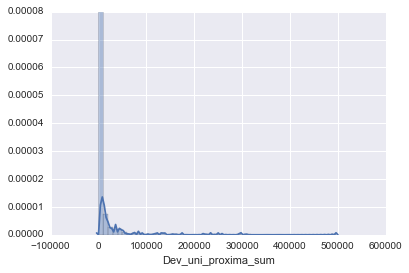

In [51]:
sns.distplot(df.Dev_uni_proxima_sum)

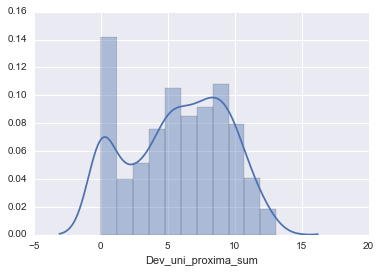

In [52]:
sns.distplot(np.log1p(df.Dev_uni_proxima_sum))

### Distribution of counts by product

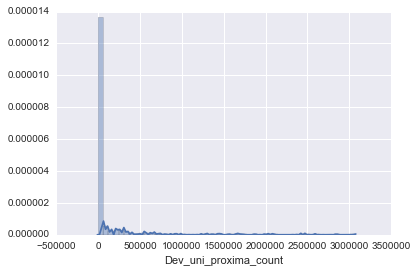

In [53]:
sns.distplot(df.Dev_uni_proxima_count)

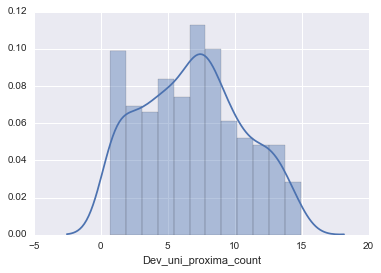

In [54]:
sns.distplot(np.log1p(df.Dev_uni_proxima_count))

### lets aggregate by week and short_name now

In [55]:
df_hmp = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
      groupby(['Semana','short_name'])['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 'Dev_uni_proxima_count'].sum().reset_index())

In [56]:
df_hmp.head()

Semana             short_name  Demanda_uni_equil_sum  Venta_uni_hoy_sum  \
0       3                                         26952              27249   
1       3       ActiFresh Menta                    4140               4511   
2       3  ActiFresh Yerbabuena                    3821               4120   
3       3     Agua Ciel Jamaica                    5838               5962   
4       3       Agua Ciel Limon                    5752               5943   

   Dev_uni_proxima_sum  Dev_uni_proxima_count  
0                  431                    818  
1                  466                     60  
2                  489                     60  
3                  137                    205  
4                  207                    200

### a quick check if demand distribution changes week to week

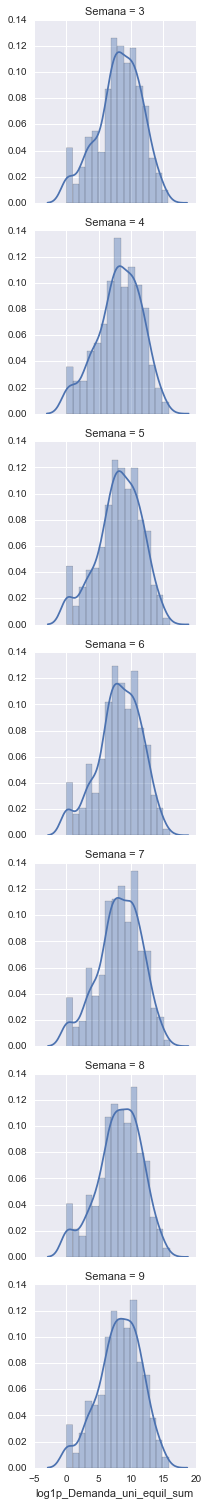

In [57]:
df_hmp['log1p_Demanda_uni_equil_sum'] = np.log1p(df_hmp.Demanda_uni_equil_sum)
g = sns.FacetGrid(df_hmp, row = 'Semana')
g = g.map(sns.distplot, 'log1p_Demanda_uni_equil_sum')

### Now let's look at which products sell by week with interactive heatmaps. Let's use our quantiles here.

In [58]:
from bokeh.charts import HeatMap
from bokeh.plotting import vplot

heatmaps = []
for i in df.Q.cat.categories.values:
    hm = HeatMap(df_hmp[df_hmp.short_name.isin(df[df.Q == i].index.values)],
                        x='short_name', y = 'Semana', values = 'Demanda_uni_equil_sum',
                 hover_tool = True, title = 'Products with summary demand '+ str(i), xgrid = False,
                 stat = 'sum',plot_width=950, plot_height=400, tools='hover, box_zoom, resize, save, wheel_zoom, reset',
                 )
    heatmaps.append(hm)
show(vplot(*heatmaps))

### Same series of charts but for returns

In [59]:
from bokeh.charts import HeatMap
from bokeh.plotting import vplot
df['Q_ret'] = pd.qcut(df.Dev_uni_proxima_sum, 5)
heatmaps = []
for i in df.Q_ret.cat.categories.values:
    hm = HeatMap(df_hmp[df_hmp.short_name.isin(df[df.Q_ret == i].index.values)],
                        x='short_name', y = 'Semana', values = 'Demanda_uni_equil_sum',
                 hover_tool = True, title = 'Products with summary returns '+ str(i), xgrid = False,
                 stat = 'sum',plot_width=800, plot_height=400, tools='hover, box_zoom, resize, save, wheel_zoom, reset',
                 )
    heatmaps.append(hm)
show(vplot(*heatmaps))